In [151]:
!find ../../../workspace -type d -name ".ipynb_checkpoints" -exec rm -rf {} +

In [141]:
!python3 rename.py

In [152]:
!python3 run_example_designs.py --architecture simple_weight_stationary --problem CONV/UndilatedDeepLabv3



Running mapper for target simple_weight_stationary in /home/workspace/final-project/example_designs/example_designs/simple_weight_stationary/outputs/UndilatedDeepLabv3_layer22...


Running mapper for target simple_weight_stationary in /home/workspace/final-project/example_designs/example_designs/simple_weight_stationary/outputs/UndilatedDeepLabv3_layer5...


Running mapper for target simple_weight_stationary in /home/workspace/final-project/example_designs/example_designs/simple_weight_stationary/outputs/UndilatedDeepLabv3_layer34...

Running mapper for target simple_weight_stationary in /home/workspace/final-project/example_designs/example_designs/simple_weight_stationary/outputs/UndilatedDeepLabv3_layer18...



Running mapper for target simple_weight_stationary in /home/workspace/final-project/example_designs/example_designs/simple_weight_stationary/outputs/UndilatedDeepLabv3_layer9...


Running mapper for target simple_weight_stationary in /home/workspace/final-project/example_des

[21.43, 14.29, 21.43, 14.29, 14.29, 14.29, 21.43, 14.29, 14.29, 21.43, 14.29, 14.29, 7.14, 4.76, 4.76, 4.76, 7.14, 4.76, 4.76, 7.14, 4.76, 4.76, 7.14, 4.76, 4.76, 32.7, 23.81, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 4.76, 78.57, 7.14, 33.33, 4.76, 7.14] [21.43, 14.29, 21.43, 14.29, 14.29, 14.29, 21.43, 14.29, 14.29, 21.43, 14.29, 14.29, 7.14, 4.76, 4.76, 4.76, 7.14, 4.76, 4.76, 7.14, 4.76, 4.76, 7.14, 4.76, 4.76, 32.7, 23.81, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 32.7, 23.81, 23.81, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 14.29, 7.14, 7.14, 7.14, 14.29, 21.43]


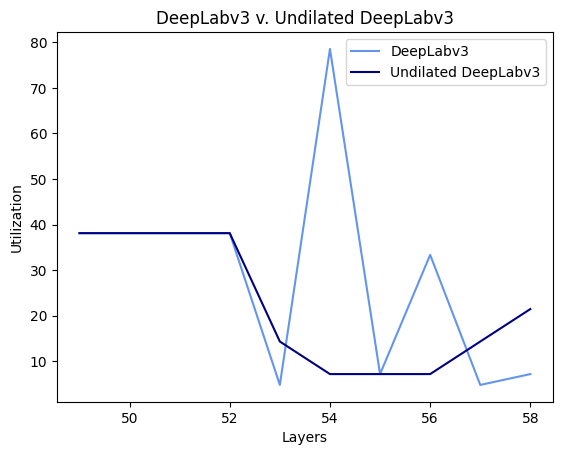

In [169]:
import re
import os
import matplotlib.pyplot as plt
import numpy as np

def extract_numbers_from_lines(file_path, string):
     with open(file_path, 'r') as file:
        for line in file:
            if string in line:
                number_match = re.search(r'\d+\.\d+', line)
                if number_match:
                    return float(number_match.group())
            if string in line:
                number_match = re.search(r'\d+', line)
                if number_match:
                    return int(number_match.group())

def extract_layer_number(filename):
    return int(re.search(r'r(\d+)', filename).group(1))

def get_data(string):
    data_dir1 = []
    data_dir2 = []
    file_dir1 = 'example_designs/eyeriss_like/outputs_DeepLabv3/'
    file_dir2 = 'example_designs/eyeriss_like/outputs_UndilatedDeepLabv3/'

    dir1 = os.listdir(file_dir1)
    dir2 = os.listdir(file_dir2)

    file_ls1 = sorted(dir1, key=extract_layer_number)
    file_ls2 = sorted(dir2, key=extract_layer_number)

    for file in file_ls1:
        file += '/timeloop-mapper.stats.txt'
        path = os.path.join(file_dir1, file)
        data_dir1.append(extract_numbers_from_lines(path, string))

    for file in file_ls2:
        file += '/timeloop-mapper.stats.txt'
        path = os.path.join(file_dir2, file)
        data_dir2.append(extract_numbers_from_lines(path, string))

    print(data_dir1, data_dir2)
    return data_dir1, data_dir2

def graph_data(data_dir1, data_dir2, string):
    x_values = np.array(range(len(data_dir1)))
    string = re.sub(r'[ :]', '', string)
    
    timeframe = 10
    data_dir1 = data_dir1[-timeframe:]
    data_dir2 = data_dir2[-timeframe:]
    x_values = x_values[-timeframe:]
    
    plt.plot(x_values, np.array(data_dir1), color='#6495ED', label="DeepLabv3")
    plt.plot(x_values, np.array(data_dir2), color='#000080', label="Undilated DeepLabv3")

    plt.xlabel('Layers')
    plt.ylabel(string)
    plt.title('DeepLabv3 v. Undilated DeepLabv3')
    plt.legend()
    plt.show()

string = "Utilization:"
data_dir1, data_dir2 = get_data(string)
graph_data(data_dir1, data_dir2, string)